Shah Rahim  
Intro to Data Science  
Intermmediate report  


# Topic : 2018's NBA MVP

## Data Mining:
    - Mining Type: Web Scraping
    - Data Source: espn.com
    - Language: Python
    - Library: Beautiful Soup
    
## Overview:
For this project, I have chosen to mine and analyze data pertaining to the NBA. This topic has been an interest of  mine and I wanted to use data science concepts taught in class to embellish upon some interesting findings. The reason why this is an interesting topic is because basketball is one of the most popular sports in the world. The NBA is the world's most premier basketball league with a very large fan base. Fans are very keen on predicting who will be the next MVP or which team will be the next NBA champions. From my experience, many people make predictions soley based on their limited understanding of the game with little research to back up their claims. I howver will make a prediction with solid analytics and machine learning. Beginning this project, I wanted to pick a data source that had both credibility and volume. NBA.com was my first choice but I ran into many bottle necks with scraping the data, so ESPN was the next best option. This notebook consists of my source code, and some the findings I across during my journey. 
    

## Note: 
After working on this intermeddiate report, I have realized that I will need to scrape more data for my sample dataset. This report is simply some analysis' that I could come up with, and my plan is to scrape more data following this report. I planned on scraping more data for this report, but I was affraid I would have to spend quite a bit of time debugging my code to accommodate the data, so I will scrape more data after this report.  


## Scraping:

#### Source Code is attached in the zip file, please have a look 


Apologies for the long and cluttered python code. It is my first time scraping data on the web using python, so there are many shortcuts that I have yet to learn. This code was originally written mostly in the main method, but debugging became a big issue, so I wrote helper methods to help with debugging and code reusability.   


### Getting the top 10 players data: 
This dataset was scraped from the ESPN website. The first task that is being accomplished is scraping each season's top 10 players from the year 2008-2018. Seasons 2008-2017 will serve as training data. The data consists of: Player name, position, height, age, weight, team, team record, games played, games started, minutes played, field goals made versus attempted, field goal percentage, 3-points made versus attempted, free-throws made versus attempted, free-throw percentage, points per game...ect. The csv file for each season's data consists of categorical and quantative data types which will make for a variety of different visualizations. 

**Bottle Necks:**

- I originally attempted to scrape data from the official NBA website, and tried many times to extract the information I needed. Sadly, everytime I retrievd the contents of the webpage through the beautiful soup library, the data was missing. After many attempts I decided to scrape data from another website , thus I chose ESPN. 

- Each players row of data on the website had alternating class names for their class tags. Class names were either "odd...ect" or "even...ect". To solve this problem, I simply created separate containers for each class, and I had to scrape the odd class tags separatly from the even. I also alternated between containers to write the players stats in chronological order into the csv file.
    
- Certain players' age attribute was in a separate tag location than most players. This kept causing runtime errors and to fix this, I had to create a helper method isVetPlayer() which identified the players with this special case and lets the program know to look in another tag for their age
    
- Another special case was related to players such as Kevin Durant, Chris Paul and Deron Williams. When atempting to scrape their team acronyms for cetain seasons, the program crashed because their team tags were not existent. To solve this, I had to manually put in their team name. 
    
---------------------------------------------------------------------------------------------------------------------------
The result is as follows:


### Getting the team standings data
Scraping the team standings data was simpler than scraping the player stats. The source of this data is also from ESPN. I used a dictionary that kept the stats for each team. Each key was the acronym for the teams, and the value was the respective team's list of stats. This was very useful as I could easily look up team stats in O(1) time and insert certain information in the player stats such as team-record. Each csv file consists of all 30 NBA teams and their respective stats such as wins-losses, home wins, away wins,conference wins, points per game, difference and streak.

**Bottle Necks:**

- One big bottleneck was the runtime of this specific aspect of the code. When I was only scraping player data, the runtime was no more than 10 seconds. After adding the functionality of scraping team stats, the runtime was on average half of a minute. This was a problem as everytime I wanted to test small aspects of the code, I would have to wait quite a bit. This was one of the main reasons I aded a dictionary because otherwise the runtime would me much longer.

---------------------------------------------------------------------------------------------------------------------------
The result is as follows:


### Getting the MVP data
Last but not least, I scraped each season's MVP stats which is also from the ESPN website. This will serve as important training data for my model. I created a separate file for this data set for easy accessibility and readibility. 

**Bottle Necks:**

- One big bottleneck was again performance. Adding this functionality added 10 to 15 more seconds to the runtime of this program. Besides the runtime, the scraping the data for this dataset was quite straight forward and easy. 

---------------------------------------------------------------------------------------------------------------------------
The result is as follows:

## Analysis and Visualization

The next part of this report consists of visualizations and some analysis made from these visualizations.


**Visualization 1** 

First lets us see any correlations in points per game for the MVPs of each year with their respective age. The code and visuals for this visualization is as follows:

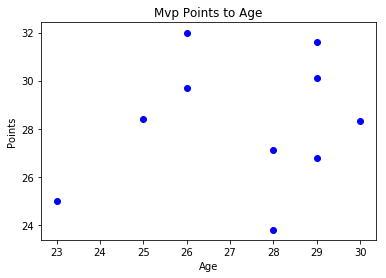

In [23]:
import csv
from matplotlib import pyplot as plt

def getMvpCsvData(filename, index,data_type):
    lis = [0]*10    
    with open(filename, 'r')as csv_file:
        csv_reader = csv.reader(csv_file)
        i = 0
        for line in csv_reader:
            if(i>0):
                if(data_type=='f'):
                    lis[i-1] = float(line[index])
                elif(data_type=='i'):
                    lis[i-1] = int(line[index])
                else:
                    lis[i-1] = line[index]
                #print(int(line[25]))
            i+=1
        return lis

age = getMvpCsvData('mvp.csv',4,'i')
points = getMvpCsvData('mvp.csv',25,'f')
plt.scatter(age,points,label='age',color='b')
plt.xlabel('Age')
plt.ylabel('Points')
plt.title('Mvp Points to Age')
plt.show()

**Analysis 1**

From this scatter plot I do not see much of a correlation between the age of the MVP and the amount of points they scored. So I conclude that the age of the MVP and the points they scored per game has no correlation.


**Visualization 2**

Now let us look a histogram of different age groups of the MVPs 

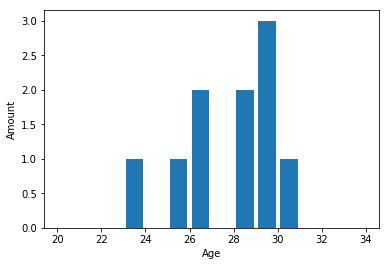

[30, 25, 26, 23, 28, 29, 26, 28, 29, 29]


In [30]:
age_bins = [0]*15
i = 0
for j in range(20,35):
    age_bins[i] = j
    i+=1

plt.hist(age,age_bins,histtype='bar',rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('Amount')
plt.show()
print(age)

**Analysis 2**

This histogram demonstartes that among the last 10 years of NBA MVPs, 30% of them were 29 years old and 70% were in the range of 26-29. This is a good insight as there is a more likely chance that a player in the range of 26-29 years old of being MVP.


**Visualization 3**

Now let us see if there is correlation between points scored per game of the MVP and their respective team record average. 

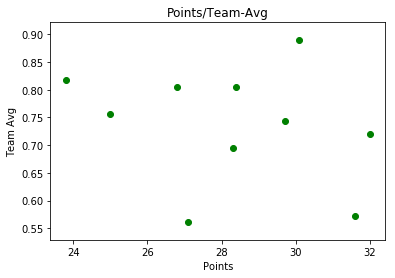

In [67]:
def getWinPer(team_record):
    lis = [0]*10
    j = 0
    k = 0
    for i in team_record:
        while(True):
            if(i[j]=='-'):
                break
            j+=1
        avg = float("{0:.3f}".format( int(i[0:j])/82))
        
        lis[k] = avg
        j = 0
        k+=1
    return lis

team_record = getMvpCsvData('mvp.csv',7,'s')
team_avg = getWinPer(team_record)
plt.scatter(points,team_avg,label='Points/Team-Avg',color='g')
plt.xlabel('Points')
plt.ylabel('Team Avg')
plt.title('Points/Team-Avg')
plt.show()

**Analysis 3**

To my surprise, there is no real correlation between the points per game for the MVP and his respective team-record average. This shows that a player's team can have a mediocre record all the while the MVP scores many points. An example of this is Russell Westbrook who scored 31.6 ppg and his team record is below 60%


**Visualization 4**

Now let us look at the poisitions of the MVPs. The goal is to see which position is more likely to fit into the MVP category.

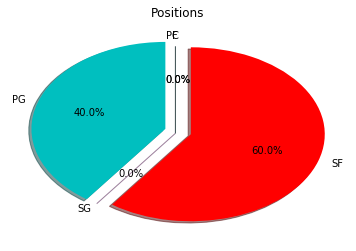

In [50]:
def posReduce(pos):
    lis = [0]*5
    for i in pos:
        if(i=='PG'):
            lis[0]+=1
        elif(i=='SG'):
            lis[1]+=1
        elif(i=='SF'):
            lis[2]+=1
        elif(i=='PF'):
            lis[3]+=1
        else:
            lis[4]+=1
    return lis

position = getMvpCsvData('mvp.csv',2,'s')
pos_list = posReduce(position)
activities = ['PG','SG','SF','PF','C']
cols=['c','m','r','b','g']
plt.pie(pos_list,
    labels=activities,
    colors = cols,
    startangle = 90,
    shadow = True,
    explode = (0.1,0,0.1,0,0),
    autopct='%1.1f%%')
plt.title('Positions')
plt.show()

**Analysis 4** 

What I found from this pie chart is that 100% of the last 10 years of MVPs were from only two positions: Point Guard and Small Forward. So I can safely conclude that it is more likely that 2018's MVP will belong to one of these two positions


**Visualization 5**

Looking into the data set, I saw that superstar Lebron James was MVP 4 times in the last 10 years. This is an unprecedented achievement and I want to look into his performance in the years he was MVP. 

So the next visualization is a stack plot of Lebrons performance in the categories: minutes played/game, rebounds/game, assists/game, blocks/game, steals/game, and points/game.

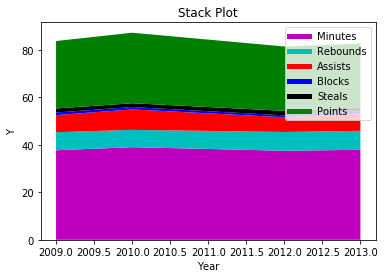

In [56]:
def getLebronMvpData(stat_list):
    lis = [0]*4
    lis[0] = stat_list[1]
    lis[1] = stat_list[2]
    lis[2] = stat_list[4]
    lis[3] = stat_list[5]
    return lis

years = getMvpCsvData('mvp.csv',0,'i')
minutes = getMvpCsvData('mvp.csv',10,'f')
rebounds = getMvpCsvData('mvp.csv',19,'f')
assists = getMvpCsvData('mvp.csv',20,'f')
blocks = getMvpCsvData('mvp.csv',21,'f')
steals = getMvpCsvData('mvp.csv',22,'f')

lebron_years = getLebronMvpData(years)
lebron_minutes = getLebronMvpData(minutes)
lebron_rebounds = getLebronMvpData(rebounds)
lebron_assists = getLebronMvpData(assists)
lebron_blocks = getLebronMvpData(blocks)
lebron_steals = getLebronMvpData(steals)
lebron_points = getLebronMvpData(points)

plt.plot([],[],color='m',label='Minutes',linewidth=5)
plt.plot([],[],color='c',label='Rebounds',linewidth=5)
plt.plot([],[],color='r',label='Assists',linewidth=5)
plt.plot([],[],color='b',label='Blocks',linewidth=5)
plt.plot([],[],color='k',label='Steals',linewidth=5)
plt.plot([],[],color='g',label='Points',linewidth=5)
plt.stackplot(lebron_years,lebron_minutes,lebron_rebounds,lebron_assists,lebron_blocks,lebron_steals,lebron_points,colors=['m','c','r','b','k','g'])
plt.xlabel('Year')
plt.ylabel('Y')
plt.title('Stack Plot')
plt.legend()
plt.show()

**Analysis 5**

This Stack plot does not demonstate much information, but it emphasizes one key point in Lebron's 4 years of reigning as the role of MVP: 
- Lebron has evolved into a team player which is evident by him scoring less points, and focusing on other aspects such as rebounds, and assists which have gradually increased.

So the take away is that to be an MVP, it does not mean that a player must score a definite amount, but they can still be MVP if they make up for the lack of points in other categories such as rebounds and assists.

**Visualization 6**

Now let us look at the percentage stats such as FG%, 3P% for all of the mvps:

In [66]:
fg = getMvpCsvData('mvp.csv',12,'f')
three_pg = getMvpCsvData('mvp.csv',14,'f')
plt.plot(years,fg,label='FG%',linewidth=4)
plt.plot(years,three_pg,label="3P%",linewidth=4)
plt.title('Field Goal %')
plt.ylabel('%')
plt.xlabel('Year')
plt.legend()
plt.grid(True,color='k')
plt.show()

**Analysis 6**

What I gathered from this line graph is that 3P% should be atleast above 30% and overall FG% should be above 40%. What I also see is that certain players had a noticably less FG% and 3P% but still managed to become MVP. 

## Thoughts and Conclusions:
I have concluded from this report that my dataset needs to be larger. I have spoken to my TA regarding this, and I was given the go-ahead to put together my report but I will need more data. The dataset I have so far is 11 seasons of the top 10 players, 11 seasons of the teams standings data, and the a file containing the last 10 MVPs. My goal is to increase this sample size by scraping the last 40 years of MVPs, including their respective top 10 players and if possible, the each years teams stats. This larger sample size will make for a more thorough and complete analysis. After I scrape more data, I hope to do more in-depth data visualizations and analysis. After this I wish to use machine learning libraries such as sklearn to learn and come up with a feasible model. One useful application of this topic is if I wish to make a fantasy league in any sport, I can scrape the data and use concepts of predictive analytics to come up with a great fantasy team.  